# Regularization and Hyperparameter Tuning using Fashion-MNIST

**Author**: Tianxiang (Adam) Gao <br>
**Course**: CSC 383 / 483 – Applied Deep Learning <br>
**Description**:  
In this assignment, you will explore how neural networks can **overfit** training data and how **regularization** techniques such as dropout and weight decay can improve **generalization**.

You will also experiment with **hyperparameter tuning**, adjusting parameters like the learning rate and dropout rate to find combinations that lead to better model performance.


## Setup

We will first import some useful libraries:
- `numpy` for numerical operations (e.g., arrays, random sampling).
- `keras` for loading the MNIST dataset and building deep learning models.
- `keras.layers` provides the building blocks (dense layers, convolutional layers, activation functions, etc.) to design neural networks.
- `matplotlib` for visualizing images and plotting graphs.
- `sklearn.model_selection` for splitting a validation set from the training data.

In [ ]:
import numpy as np
import keras
from keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Prepare the Data [0/0]

1. Use `keras.datasets.fashion_mnist.load_data()` to load the **Fashion-MNIST** training and test sets.  
2. Normalize all pixel values from integers in the range **[0, 255]** to floating-point numbers between **0 and 1**.  

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train_full = x_train_full.astype("float32") / 255.0
y_train_full = y_train_full.squeeze().astype("int32")
x_test = x_test.astype("float32") / 255.0
y_test = y_test.squeeze().astype("int32")
print("x_train shape:", x_train_full.shape)
num_classes, input_shape = 10, x_train_full.shape[1:]
print("num_classes:", num_classes)
print("input_shape:", input_shape)


x_train shape: (60000, 28, 28)
num_classes: 10
input_shape: (28, 28)


## Visualize the Data [0/0]

3. Randomly select **9 images** from the training set `x_train`. Display them in a **3×3 grid** using Matplotlib (`plt.subplot`). For each image, show its corresponding **class label** (from `y_train`) as the subplot title.



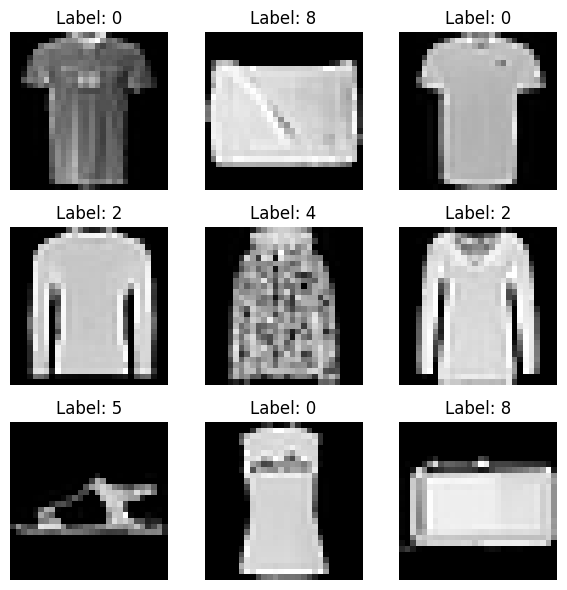

In [ ]:
indices = np.random.choice(len(x_train_full), 9, replace=False)

plt.figure(figsize=(6, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_full[idx], cmap="gray")
    # plt.imshow(x_train_full[idx])
    plt.title(f"Label: {y_train_full[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Validation Set [10/10]

4. We will use `train_test_split()` split **50%** of the images from the training dataset to create a **validation set**,  
which will be used to help us **tune the hyperparameters** during training.


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(

)

print("Train subset:", x_train.shape)
print("Validation subset:", x_val.shape)
print("Test set:", x_test.shape)

Train subset: (30000, 28, 28)
Validation subset: (30000, 28, 28)
Test set: (10000, 28, 28)


## Build the Model [30/30]

5. Implement a helper function `make_model()`  
   that returns a simple **two-layer MLP** built using `keras.Sequential` with the following layers:
   - **Input layer**: accepts images of shape `input_shape`.
   - **Flatten layer**: converts each 2D image into a 1D vector.
   - **Dense layer**: fully connected layer with `width` hidden units and `"relu"` activation.
   - **Dropout layer**: randomly drops a fraction of hidden activations (`dropout_rate`) during training  
     to prevent overfitting. Skip this layer if `dropout_rate = 0`.
   - **Output layer**: fully connected layer with `num_classes` units (one per class) and `"softmax"` activation.


6. Create a `base_model` using your helper function and inspect the model by calling `model.summary()` to display the network architecture, output shapes, and number of parameters in each layer.

7. Save the `initial_weights` of the `base_model` for reuse in optimizer comparisons.


In [ ]:
def make_model(num_classes, input_shape, width=128, dropout_rate=0.0):
    model = keras.Sequential([

    ])
    return model

base_model = make_model(num_classes, input_shape, width=128)
base_model.summary()

initial_weights = base_model.get_weights()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Define Optimizer Function [0/0]

8. To easily switch between different optimization algorithms, copy and paste the helper function  
   `get_optimizer()` from previous assignments.  
   This function should return the corresponding **Keras optimizer object** based on its name.

   Implement the function with the following behavior:
   - `"sgd"` → standard **stochastic gradient descent (SGD)**.  
   - `"momentum"` → **SGD with momentum** (`momentum=0.9`).  
   - `"rmsprop"` → **RMSprop** optimizer (adaptive learning rate).  
   - `"adam"` → **Adam** optimizer (adaptive learning rate with momentum).  
   - Raise a `ValueError` if an unknown name is provided.


In [1]:
def get_optimizer(name, lr=1e-3):
    if name == "sgd":
        return keras.optimizers.SGD(learning_rate=lr)
    if name == "momentum":
        return keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    if name == "rmsprop":
        return keras.optimizers.RMSprop(learning_rate=lr)
    if name == "adam":
        return keras.optimizers.Adam(learning_rate=lr)
    raise ValueError(f"Unknown optimizer: {name}")

## Train and Compare Optimizers [20/20]

9. We will also define a helper function `train()` to train the model using different optimization choices.  
   This function is adapted from previous assignments and includes additional input arguments such as  
   `dropout_rate`, `lr`, and `width`.
   
   The function should:
   - Recreate a **fresh model** via `make_model(...)`.
   - **Reset** to the same `initial_weights` to ensure all optimizers start from the same point.  
   - Build the optimizer using `get_optimizer(name, lr)`.  
   - **Compile** the model with `loss="sparse_categorical_crossentropy"` and `metrics=["accuracy"]`.  
   - **Train** the model on `(x_train, y_train)` and evaluate it using the validation data `(x_val, y_val)`.  
   - **Return** the training `History` object for later comparison.

In [ ]:
def train(name, dropout_rate=0.0, lr=1e-3, batch_size=64, width=128, epochs=100):
  model =
  model.set_weights(initial_weights)
  opt =
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
  print(f"\n===Training with {name}===")
  hist =
  return hist

## Experiment: Training with SGD [5/5]

10. Now train your model using **stochastic gradient descent (SGD)** with a high learning rate (`lr=1e-1`) and **no dropout**. This setup will intentionally cause **overfitting** or even unstable training, allowing you to observe how training and validation accuracy diverge.



In [ ]:
hist = train("sgd", dropout_rate=0.0, lr=1e-1)


===Training with sgd===
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6902 - loss: 0.9003 - val_accuracy: 0.7994 - val_loss: 0.5654
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8273 - loss: 0.4948 - val_accuracy: 0.8408 - val_loss: 0.4528
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8489 - loss: 0.4317 - val_accuracy: 0.8334 - val_loss: 0.4438
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8567 - loss: 0.4073 - val_accuracy: 0.8327 - val_loss: 0.4501
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8618 - loss: 0.3820 - val_accuracy: 0.8530 - val_loss: 0.4107
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8668 - loss: 0.3741 - val_accuracy: 0.8638 - val_loss: 0.3811
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8734 - loss: 0.3577 - val_accuracy: 0.8589 - val_loss: 0.3862
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.879

## Plot Training and Validation Curves [5/5]

11. Define a helper function `plot_history(hist, log_scale=False)` to visualize the **training** and **validation** loss curves from the `History` object returned by `model.fit()`.

    - Plot both **training loss** and **validation loss** on the same graph.  
    - Add axis labels, a title, and a legend for clarity.  
    - Use the optional argument `log_scale=True` to show the loss on a logarithmic scale.


In [ ]:
def plot_history(hist, log_scale=False):
  plt.figure(figsize=(8,5))
  plt.plot(hist.history["loss"], color="blue", linestyle="-", label="train")
  plt.plot(hist.history["val_loss"], color="red", linestyle="--", label="val")

  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Training vs Validation Loss")
  plt.legend()
  plt.grid(True, which="both", ls=":")
  if log_scale:
      plt.yscale("log")
      plt.ylabel("Loss (log scale)")
  plt.show()

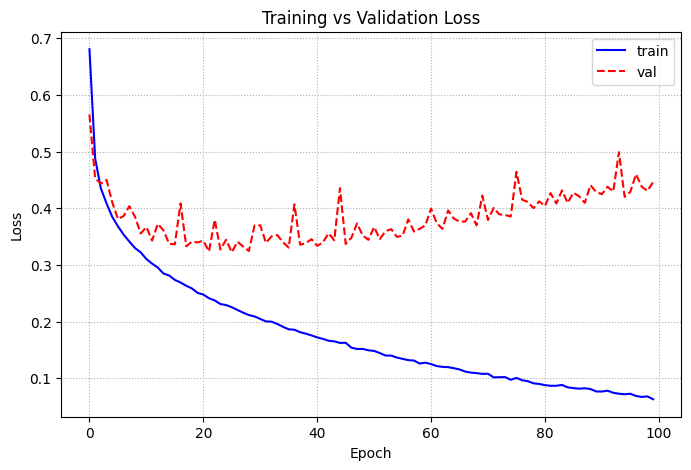

In [ ]:
# Plot the result

## Experiment: Training with SGD + Dropout [5/5]

12. Now train the model again using **SGD** with the same learning rate (`lr=1e-1`) but add **dropout = 0.5** to apply regularization. Compare the results with the previous run to see how dropout helps reduce overfitting and improves validation performance.


In [ ]:
hist =


===Training with sgd===
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6264 - loss: 1.0564 - val_accuracy: 0.8114 - val_loss: 0.5471
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7895 - loss: 0.6035 - val_accuracy: 0.8197 - val_loss: 0.4904
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8099 - loss: 0.5358 - val_accuracy: 0.8420 - val_loss: 0.4408
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8215 - loss: 0.5000 - val_accuracy: 0.8534 - val_loss: 0.4137
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8340 - loss: 0.4696 - val_accuracy: 0.8457 - val_loss: 0.4211
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8338 - loss: 0.4648 - val_accuracy: 0.8549 - val_loss: 0.3986
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8392 - loss: 0.4464 - val_accuracy: 0.8610 - val_loss: 0.3844
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8420 

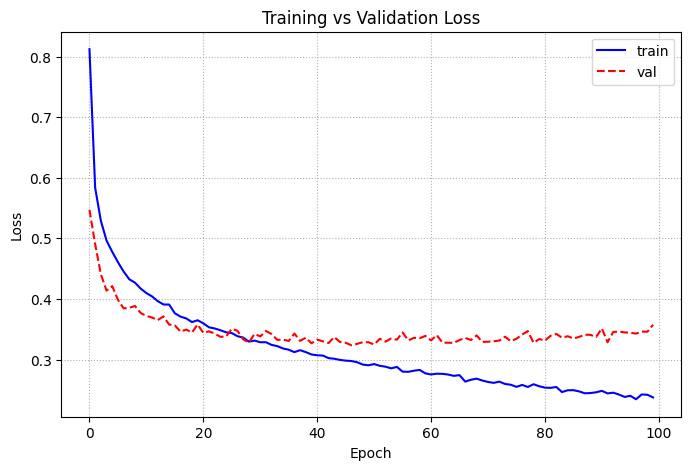

In [ ]:
plot_history(hist)

## Hyperparameter Search: Learning Rate vs Dropout [25/25]

13. Now we will perform a simple **grid search** over two important hyperparameters: **Learning rate (`lr`)** and **Dropout rate (`dropout`)**

   For each combination of learning rate and dropout rate:
   - Build a new model using `make_model(...)`.
   - train the model for a fixed number of epochs (e.g. 20) using the **SGD** optimizer
   - and record both  the **training accuracy** and **validation accuracy** from the **last epoch**.

   This will help us visualize which combinations lead to underfitting, overfitting, or the best generalization.


In [ ]:
# Define search ranges
import random

learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
dropouts = [0.0, 0.2, 0.5, 0.7]

results = []  # store results in a list of dicts
trials = 10

for lr in learning_rates:
    for drop in dropouts:
        print(f"\nTraining with lr={lr}, dropout={drop}")
        model =
        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=lr),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )
        hist =
        val_acc =
        train_acc =

        print(f"train_acc={train_acc:.3f}, val_acc={val_acc:.3f}")

        results.append([lr, drop, train_acc, val_acc])


Training with lr=0.0001, dropout=0.0
train_acc=0.569, val_acc=0.573

Training with lr=0.0001, dropout=0.2
train_acc=0.501, val_acc=0.569

Training with lr=0.0001, dropout=0.5
train_acc=0.394, val_acc=0.577

Training with lr=0.0001, dropout=0.7
train_acc=0.322, val_acc=0.538

Training with lr=0.001, dropout=0.0
train_acc=0.755, val_acc=0.760

Training with lr=0.001, dropout=0.2
train_acc=0.720, val_acc=0.750

Training with lr=0.001, dropout=0.5
train_acc=0.679, val_acc=0.734

Training with lr=0.001, dropout=0.7
train_acc=0.615, val_acc=0.718

Training with lr=0.01, dropout=0.0
train_acc=0.843, val_acc=0.842

Training with lr=0.01, dropout=0.2
train_acc=0.831, val_acc=0.840

Training with lr=0.01, dropout=0.5
train_acc=0.813, val_acc=0.835

Training with lr=0.01, dropout=0.7
train_acc=0.780, val_acc=0.827

Training with lr=0.1, dropout=0.0
train_acc=0.894, val_acc=0.862

Training with lr=0.1, dropout=0.2
train_acc=0.886, val_acc=0.880

Training with lr=0.1, dropout=0.5
train_acc=0.863, 

In [ ]:
print("\n=== Summary ===")
print(" lr\t dropout\t train_acc\t val_acc")
for r in results:
    print(f"{r[0]:.0e}\t {r[1]:.1f}\t\t {r[2]:.3f}\t\t {r[3]:.3f}")


=== Summary ===
 lr	 dropout	 train_acc	 val_acc
1e-04	 0.0		 0.569		 0.573
1e-04	 0.2		 0.501		 0.569
1e-04	 0.5		 0.394		 0.577
1e-04	 0.7		 0.322		 0.538
1e-03	 0.0		 0.755		 0.760
1e-03	 0.2		 0.720		 0.750
1e-03	 0.5		 0.679		 0.734
1e-03	 0.7		 0.615		 0.718
1e-02	 0.0		 0.843		 0.842
1e-02	 0.2		 0.831		 0.840
1e-02	 0.5		 0.813		 0.835
1e-02	 0.7		 0.780		 0.827
1e-01	 0.0		 0.894		 0.862
1e-01	 0.2		 0.886		 0.880
1e-01	 0.5		 0.863		 0.869
1e-01	 0.7		 0.828		 0.858


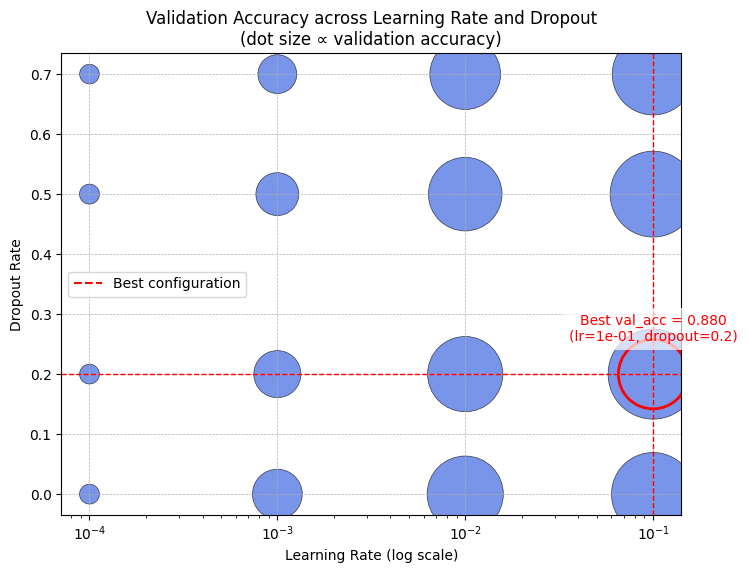

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Convert results to NumPy array
results = np.array(results, dtype=float)
lr = results[:, 0]
drop = results[:, 1]
train_acc = results[:, 2]
val_acc = results[:, 3]

# Normalize validation accuracy to [0, 1]
val_acc_norm = (val_acc - val_acc.min()) / (val_acc.max() - val_acc.min() + 1e-8)

# Exaggerate size differences for visibility
sizes = 200 + 4000 * (val_acc_norm ** 3)

plt.figure(figsize=(8, 6))
plt.scatter(
    lr, drop,
    s=sizes,
    color="royalblue",
    alpha=0.7,
    edgecolors="black",
    linewidths=0.5
)

plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Dropout Rate")
plt.title("Validation Accuracy across Learning Rate and Dropout\n(dot size ∝ validation accuracy)")
plt.grid(True, ls="--", lw=0.5)

# Identify best point
best_idx = np.argmax(val_acc)
best_lr, best_drop, best_val = lr[best_idx], drop[best_idx], val_acc[best_idx]

# Draw dashed guide lines for the best point
plt.axvline(best_lr, color="red", linestyle="--", linewidth=1)
plt.axhline(best_drop, color="red", linestyle="--", linewidth=1)

# Mark the best point with a circle
plt.scatter(best_lr, best_drop, s=2500, facecolors="none", edgecolors="red", linewidths=2)

# Add annotation
plt.text(best_lr, best_drop + 0.05,
         f"Best val_acc = {best_val:.3f}\n(lr={best_lr:.0e}, dropout={best_drop:.1f})",
         color="red", fontsize=10, ha="center", va="bottom",
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

# Create a custom line legend handle
custom_line = Line2D([0], [0], color="red", lw=1.5, linestyle="--", label="Best configuration")

# Add legend using the custom line
plt.legend(handles=[custom_line])

plt.show()
